# Análise do COVID-19 no Brasil (Infectados)

Este estudo usa parte do codigo dessa análise: https://github.com/lucaslattari/COVID-19

E os parâmetros utilizados nessa análise: https://docs.google.com/document/d/1ZDxOrn9ZljIzrfAnUiDjjLR28ORrvn6tHi2q3ig6WKc

Fonte dos dados: https://github.com/CSSEGISandData/COVID-19

## 1. Base de Dados Original

In [69]:
import urllib.request
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
plt.style.use('seaborn-whitegrid')
import ssl

ssl._create_default_https_context = ssl._create_unverified_context

urlConfirmed = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
urlDead = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
urlRecovered = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'

dfConfirmed = pd.read_csv(urlConfirmed, error_bad_lines=False)
dfDead = pd.read_csv(urlDead, error_bad_lines=False)
dfRecovered = pd.read_csv(urlRecovered, error_bad_lines=False)
#dfConfirmed = pd.read_csv('time_series_covid19_confirmed_global.csv')

dfConfirmed.head(10)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,24,40,40,74,84,94,110,110,120,170
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,76,89,104,123,146,174,186,197,212,223
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,139,201,230,264,302,367,409,454,511,584
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,88,113,133,164,188,224,267,308,334,370
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,2,2,3,3,3,4,4,5,7,7
5,NaN,Antigua and Barbuda,17.0608,-61.7964,0,0,0,0,0,0,...,1,1,3,3,3,7,7,7,7,7
6,NaN,Argentina,-38.4161,-63.6167,0,0,0,0,0,0,...,158,266,301,387,387,502,589,690,745,820
7,NaN,Armenia,40.0691,45.0382,0,0,0,0,0,0,...,160,194,235,249,265,290,329,407,424,482
8,Australian Capital Territory,Australia,-35.4735,149.0124,0,0,0,0,0,0,...,9,19,32,39,39,53,62,71,77,78
9,New South Wales,Australia,-33.8688,151.2093,0,0,0,0,3,4,...,436,669,669,818,1029,1219,1405,1617,1791,2032


## 2. Total de casos diários no mundo (ordenação decrescente)

In [70]:
def getSortedGroupByCountryDataframe(df):
    confirmedCasesGroupedDf = df.groupby('Country/Region').sum()
    sortedConfirmedCasesGroupedDf = confirmedCasesGroupedDf.sort_values(by=['Confirmed Cases'], ascending = False)
    return sortedConfirmedCasesGroupedDf

In [71]:
confirmedCasesDf = dfConfirmed.copy()
column_list = list(confirmedCasesDf)
column_last_day = column_list[-1:]
onfirmedCasesDf = confirmedCasesDf.drop(['Province/State', 'Lat', 'Long'], axis=1)
confirmedCasesDf["Confirmed Cases"] = confirmedCasesDf[column_last_day].astype('int32')

sortedConfirmedCasesGroupedDf = getSortedGroupByCountryDataframe(confirmedCasesDf)
sortedConfirmedCasesGroupedDf.head(10)

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,Confirmed Cases
Country/Region,,,,,,,,,,,,,,,,,,,,,
US,37.0902,-95.7129,1,1,2,2,5,5,5,5,...,33276,43847,53740,65778,83836,101657,121478,140886,161807,161807
Italy,43.0000,12.0000,0,0,0,0,0,0,0,0,...,59138,63927,69176,74386,80589,86498,92472,97689,101739,101739
Spain,40.0000,-4.0000,0,0,0,0,0,0,0,0,...,28768,35136,39885,49515,57786,65719,73235,80110,87956,87956
China,1083.3367,3684.4197,548,643,920,1406,2075,2877,5509,6087,...,81435,81498,81591,81661,81782,81897,81999,82122,82198,82198
Germany,51.0000,9.0000,0,0,0,0,0,1,4,4,...,24873,29056,32986,37323,43938,50871,57695,62095,66885,66885
France,44.4772,116.0351,0,0,2,3,3,3,4,5,...,16243,20123,22622,25600,29551,33402,38105,40708,45170,45170
Iran,32.0000,53.0000,0,0,0,0,0,0,0,0,...,21638,23049,24811,27017,29406,32332,35408,38309,41495,41495
United Kingdom,321.8262,-423.4011,0,0,0,0,0,0,0,0,...,5745,6726,8164,9640,11812,14745,17312,19780,22453,22453
Switzerland,46.8182,8.2275,0,0,0,0,0,0,0,0,...,7474,8795,9877,10897,11811,12928,14076,14829,15922,15922


### 2.1 Preparando Dados Brasil

In [101]:
def getBrazilData(dfConfirmed, dfDead, dfRecovered):
      
    dfConfirmed = dfConfirmed.drop(['Province/State'], axis=1)
    dfConfirmed = dfConfirmed.groupby('Country/Region').sum()

    dfDead = dfDead.drop(['Province/State'], axis=1)
    dfDead = dfDead.groupby('Country/Region').sum()

    dfRecovered = dfRecovered.drop(['Province/State'], axis=1)
    dfRecovered = dfRecovered.groupby('Country/Region').sum()

    confirmedCasesByDayBrazilDf = dfConfirmed.loc[['Brazil']]
    deadCasesByDayBrazilDf = dfDead.loc[['Brazil']]
    recoveredCasesByDayBrazilDf = dfRecovered.loc[['Brazil']]


    dates = list(confirmedCasesByDayBrazilDf)[2:]
    infected = confirmedCasesByDayBrazilDf.iloc[0,2:]
    dead = deadCasesByDayBrazilDf.iloc[0,2:]
    recovered = recoveredCasesByDayBrazilDf.iloc[0,2:]

    #Adicionando novos dias
    #dates = dates + ["3/22/20","3/23/20","3/24/20"]
    #novasDatas = pd.Series([1546,1960,2247], index=["3/22/20","3/23/20","3/24/20"])
    #infected = infected.append(novasDatas)

    dfForPlot = pd.DataFrame(
        {'date': dates, 'infected': infected, 'dead': dead, 'recovered': recovered})
    dfForPlot['date'] = pd.to_datetime(dfForPlot['date'])
    
    dfForPlot['active'] = dfForPlot['infected'] - dfForPlot['dead'] - dfForPlot['recovered']
    return dfForPlot



In [102]:

dfForPlot = getBrazilData(dfConfirmed, dfDead, dfRecovered)
dfForPlot.tail(10)

,date,infected,dead,recovered,active
3/21/20,2020-03-21,1021.0,15.0,2.0,1004.0
3/22/20,2020-03-22,1546.0,25.0,2.0,1519.0
3/23/20,2020-03-23,1924.0,34.0,2.0,1888.0
3/24/20,2020-03-24,2247.0,46.0,2.0,2199.0
3/25/20,2020-03-25,2554.0,59.0,2.0,2493.0
3/26/20,2020-03-26,2985.0,77.0,6.0,2902.0
3/27/20,2020-03-27,3417.0,92.0,6.0,3319.0
3/28/20,2020-03-28,3904.0,111.0,6.0,3787.0
3/29/20,2020-03-29,4256.0,136.0,6.0,4114.0
3/30/20,2020-03-30,4579.0,159.0,120.0,4300.0


Text(0, 0.5, 'Number of cases')

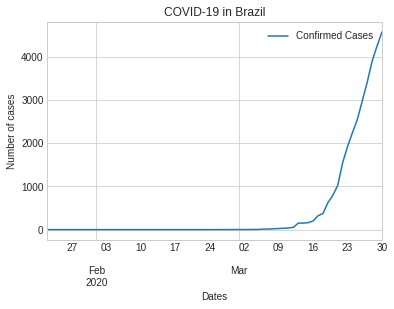

In [103]:
fig = plt.figure()
ax = plt.axes()
dfForPlot.set_index('date')['infected'].plot(legend=True, grid=True, label='Confirmed Cases');
plt.title("COVID-19 in Brazil")
plt.xlabel("Dates")
plt.ylabel("Number of cases")

## 3. Previsão por meio da Regressão

### 3.0 Dados comuns a todos os algoritmos abaixo

In [75]:
def plotGraph(X, y, XReal, yReal, algorithm):
    df = pd.DataFrame(
    {'dates': X, 'infected': y.astype(int)})
    df['dates'] = pd.to_datetime(df['dates'])

    fig = plt.figure()
    ax = plt.axes()
    redLine = plt.plot(XReal, yReal, 'r:', alpha=1 ,label='Confirmed Cases')
    df.set_index('dates')['infected'].plot(legend=True, grid=True, alpha=0.5,label='Predicted Cases')
    plt.title("COVID-19 in Brazil ("+algorithm+")")
    plt.xlabel("Dates")
    plt.ylabel("Number of cases")
    
    blue_patch = mpatches.Patch(color='blue', label='Predicted Cases')
    red_patch = mpatches.Patch(color='red', label='Confirmed Cases')
    plt.legend(handles=[red_patch, blue_patch])

In [76]:
import datetime

diasASimular = 60
dfForPlotDaysWithInfected = dfForPlot[dfForPlot['infected'] != 0]

XTrain = np.arange(0, len(dfForPlotDaysWithInfected['date']))
yTrain = dfForPlotDaysWithInfected['infected']

XPredict = np.arange(0, len(XTrain) + diasASimular)

XRealCases = dfForPlotDaysWithInfected['date']
yRealCases = dfForPlotDaysWithInfected['infected']

predictedDays = pd.date_range(dfForPlotDaysWithInfected['date'].iloc[-1] + datetime.timedelta(days=1), periods=diasASimular, freq='D')
X = np.append(dfForPlotDaysWithInfected['date'], predictedDays)

### 3.1 Regressão Linear

In [77]:
#treino
from sklearn.linear_model import LinearRegression
LRModel = LinearRegression()
LRModel.fit(XTrain.reshape(-1, 1), yTrain)

#predição
y = LRModel.predict(XPredict.reshape(-1, 1)).astype(int)
y = y + y[0] * -1
y

array([    0,   118,   235,   353,   471,   588,   706,   823,   941,
        1058,  1175,  1293,  1410,  1528,  1645,  1763,  1881,  1998,
        2116,  2233,  2351,  2469,  2586,  2704,  2821,  2939,  3057,
        3174,  3292,  3409,  3527,  3645,  3762,  3880,  3997,  4115,
        4233,  4350,  4468,  4585,  4703,  4820,  4938,  5056,  5173,
        5291,  5408,  5526,  5644,  5761,  5879,  5996,  6114,  6232,
        6349,  6467,  6584,  6702,  6820,  6937,  7055,  7172,  7290,
        7408,  7525,  7643,  7760,  7878,  7996,  8113,  8231,  8348,
        8466,  8583,  8701,  8819,  8936,  9054,  9171,  9289,  9407,
        9524,  9642,  9759,  9877,  9995, 10112, 10230, 10347, 10465,
       10583, 10700, 10818, 10935])

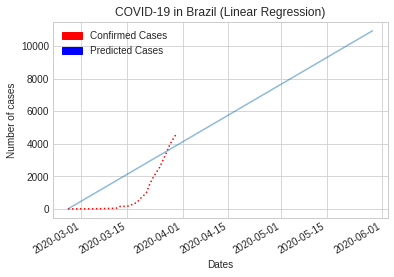

In [78]:
plotGraph(X, y, XRealCases, yRealCases, "Linear Regression")

### 3.2 Polynomial Regression 2D

In [79]:
#treino
from sklearn.preprocessing import PolynomialFeatures
polynomialFeatures = PolynomialFeatures(degree = 2)
XPoly = polynomialFeatures.fit_transform(XTrain.reshape(-1, 1))

from sklearn.linear_model import LinearRegression
polyLinearRegression = LinearRegression()
polyLinearRegression.fit(XPoly, yTrain)

#predição
XPoly = polynomialFeatures.fit_transform(XPredict.reshape(-1, 1))
y = polyLinearRegression.predict(XPoly).astype(int)
miny = min(y)
y = y + miny * -1

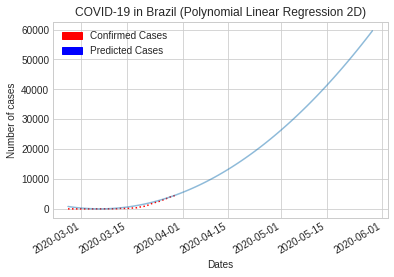

In [80]:
plotGraph(X, y, XRealCases, yRealCases, "Polynomial Linear Regression 2D")

### 3.3 Polynomial Regression 4D

In [81]:
#treino
from sklearn.preprocessing import PolynomialFeatures
polynomialFeatures = PolynomialFeatures(degree = 4)
XPoly = polynomialFeatures.fit_transform(XTrain.reshape(-1, 1))

from sklearn.linear_model import LinearRegression
polyLinearRegression = LinearRegression()
polyLinearRegression.fit(XPoly, yTrain)

#predição
XPoly = polynomialFeatures.fit_transform(XPredict.reshape(-1, 1))
y = polyLinearRegression.predict(XPoly).astype(int)
miny = min(y)
y = y + miny * -1

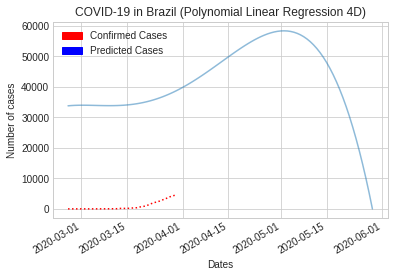

In [82]:
plotGraph(X, y, XRealCases, yRealCases, "Polynomial Linear Regression 4D")

In [83]:
#print("Proximas previsões: ")

#for idx, val in enumerate(X):
    #if idx >= len(XRealCases):
        #print(pd.to_datetime(val).strftime("%b %d"), " -> ", y[idx])

## 4. Modelo SIR

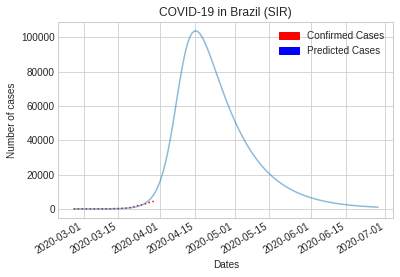

In [84]:
#TODO: Subtrair mortes e curados do real antes de plotar

import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import datetime

diasASimular = 90

dfForPlotDaysWithInfected = dfForPlot[dfForPlot['infected'] != 0]
#dfForPlotDaysWithInfected = dfForPlotDaysWithInfected[10:]

XRealCases = dfForPlotDaysWithInfected['date']
yRealCases = dfForPlotDaysWithInfected['infected']

predictedDays = pd.date_range(dfForPlotDaysWithInfected['date'].iloc[-1] + datetime.timedelta(days=1), periods=diasASimular, freq='D')
X = np.append(dfForPlotDaysWithInfected['date'], predictedDays)


# Total population, N.
N = 220000
# Initial number of infected and recovered individuals, I0 and R0.
I0, R0 = dfForPlotDaysWithInfected['infected'][0], 0
# Everyone else, S0, is susceptible to infection initially.
S0 = N - I0 - R0
# Contact rate, beta, and mean recovery rate, gamma, (in 1/days).
beta, gamma = 0.34, 1./14

# A grid of time points (in days)
t = np.linspace(0, len(X), len(X))

# The SIR model differential equations.
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

# Initial conditions vector
y0 = S0, I0, R0
# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta, gamma))
S, I, R = ret.T

plotGraph(X, I, XRealCases, yRealCases, "SIR")

In [85]:
print("Proximas previsões: ")

for idx, val in enumerate(X):
    if idx >= len(XRealCases):
        print(pd.to_datetime(val).strftime("%b %d"), " -> ", int(I[idx]))

Proximas previsões: 
Mar 31  ->  12735
Apr 01  ->  16373
Apr 02  ->  20875
Apr 03  ->  26339
Apr 04  ->  32816
Apr 05  ->  40277
Apr 06  ->  48586
Apr 07  ->  57480
Apr 08  ->  66580
Apr 09  ->  75431
Apr 10  ->  83567
Apr 11  ->  90581
Apr 12  ->  96182
Apr 13  ->  100224
Apr 14  ->  102698
Apr 15  ->  103706
Apr 16  ->  103421
Apr 17  ->  102052
Apr 18  ->  99812
Apr 19  ->  96906
Apr 20  ->  93510
Apr 21  ->  89778
Apr 22  ->  85834
Apr 23  ->  81778
Apr 24  ->  77688
Apr 25  ->  73623
Apr 26  ->  69629
Apr 27  ->  65739
Apr 28  ->  61976
Apr 29  ->  58356
Apr 30  ->  54890
May 01  ->  51582
May 02  ->  48436
May 03  ->  45451
May 04  ->  42625
May 05  ->  39954
May 06  ->  37433
May 07  ->  35057
May 08  ->  32821
May 09  ->  30717
May 10  ->  28741
May 11  ->  26885
May 12  ->  25143
May 13  ->  23509
May 14  ->  21978
May 15  ->  20543
May 16  ->  19199
May 17  ->  17940
May 18  ->  16762
May 19  ->  15660
May 20  ->  14628
May 21  ->  13664
May 22  ->  12762
May 23  ->  11918
Ma